Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 1% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders

train_filename = 'notMNIST_large.tar.gz'
test_filename = 'notMNIST_small.tar.gz'

train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

notMNIST_large already present - Skipping extraction of notMNIST_large.tar.gz.
['notMNIST_large\\A', 'notMNIST_large\\B', 'notMNIST_large\\C', 'notMNIST_large\\D', 'notMNIST_large\\E', 'notMNIST_large\\F', 'notMNIST_large\\G', 'notMNIST_large\\H', 'notMNIST_large\\I', 'notMNIST_large\\J']
notMNIST_small already present - Skipping extraction of notMNIST_small.tar.gz.
['notMNIST_small\\A', 'notMNIST_small\\B', 'notMNIST_small\\C', 'notMNIST_small\\D', 'notMNIST_small\\E', 'notMNIST_small\\F', 'notMNIST_small\\G', 'notMNIST_small\\H', 'notMNIST_small\\I', 'notMNIST_small\\J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [4]:
#display randomly 2 images from each folder
#let us get the folder for each of the image

import random
for folder in train_folders:
    print("displaying randomly 2 images from folder ",str(folder))
    #how many images it has?
    imagesFiles = os.listdir(folder)
    #get randomly 1 filenames
    randIndices = random.sample(range(0, len(imagesFiles)), 2)
    for i in randIndices:
        print("displaying image,",i, "out of:",len(imagesFiles))
        display(Image(filename = os.path.join(folder,imagesFiles[i])))  

displaying randomly 2 images from folder  notMNIST_large\A
displaying image, 23931 out of: 52912


displaying image, 40773 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\B
displaying image, 29905 out of: 52912


displaying image, 22396 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\C
displaying image, 3593 out of: 52912


displaying image, 31721 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\D
displaying image, 16696 out of: 52912


displaying image, 34485 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\E
displaying image, 1005 out of: 52912


displaying image, 48326 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\F
displaying image, 25397 out of: 52912


displaying image, 11684 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\G
displaying image, 31603 out of: 52912


displaying image, 26972 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\H
displaying image, 15789 out of: 52912


displaying image, 14754 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\I
displaying image, 4338 out of: 52912


displaying image, 37310 out of: 52912


displaying randomly 2 images from folder  notMNIST_large\J
displaying image, 37258 out of: 52911


displaying image, 13645 out of: 52911


Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [5]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

notMNIST_large\A.pickle already present - Skipping pickling.
notMNIST_large\B.pickle already present - Skipping pickling.
notMNIST_large\C.pickle already present - Skipping pickling.
notMNIST_large\D.pickle already present - Skipping pickling.
notMNIST_large\E.pickle already present - Skipping pickling.
notMNIST_large\F.pickle already present - Skipping pickling.
notMNIST_large\G.pickle already present - Skipping pickling.
notMNIST_large\H.pickle already present - Skipping pickling.
notMNIST_large\I.pickle already present - Skipping pickling.
notMNIST_large\J.pickle already present - Skipping pickling.
notMNIST_small\A.pickle already present - Skipping pickling.
notMNIST_small\B.pickle already present - Skipping pickling.
notMNIST_small\C.pickle already present - Skipping pickling.
notMNIST_small\D.pickle already present - Skipping pickling.
notMNIST_small\E.pickle already present - Skipping pickling.
notMNIST_small\F.pickle already present - Skipping pickling.
notMNIST_small\G.pickle 

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

reading pickle file  notMNIST_large\A.pickle
displaying image, 36078 out of: 52909


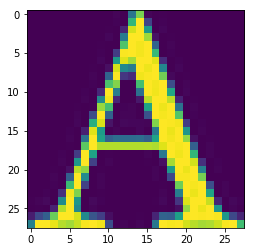

reading pickle file  notMNIST_large\B.pickle
displaying image, 11544 out of: 52911


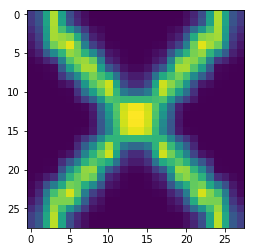

reading pickle file  notMNIST_large\C.pickle
displaying image, 14957 out of: 52912


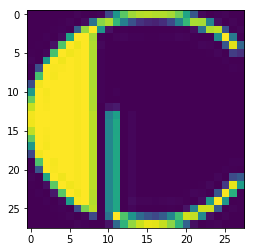

reading pickle file  notMNIST_large\D.pickle
displaying image, 20617 out of: 52911


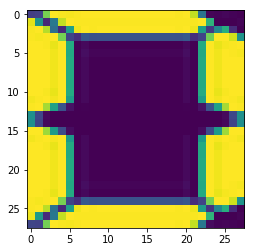

reading pickle file  notMNIST_large\E.pickle
displaying image, 20186 out of: 52912


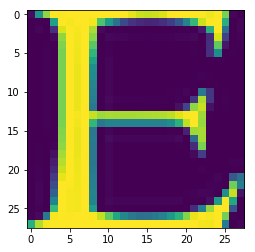

reading pickle file  notMNIST_large\F.pickle
displaying image, 19738 out of: 52912


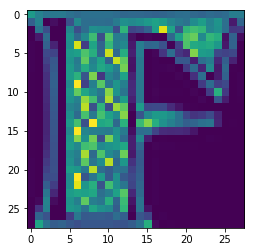

reading pickle file  notMNIST_large\G.pickle
displaying image, 3661 out of: 52912


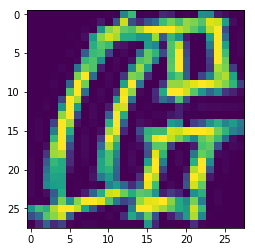

reading pickle file  notMNIST_large\H.pickle
displaying image, 20076 out of: 52912


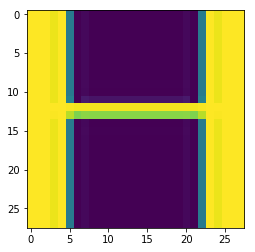

reading pickle file  notMNIST_large\I.pickle
displaying image, 23374 out of: 52912


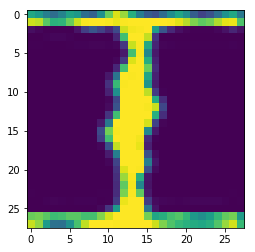

reading pickle file  notMNIST_large\J.pickle
displaying image, 10811 out of: 52911


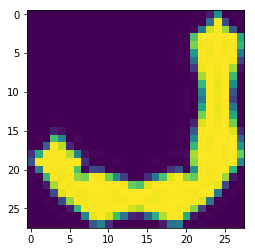

In [6]:
#lets check and make sure that the pickled images still look good
#Uncomment the below block for Problem 2
for item in train_datasets:
    print("reading pickle file ",item)
    image_data = pickle.load(open(item, "rb" ), encoding='latin1')
    #the first dimension is for the number of image and the other two dimensions give the image size
    imagesFiles = image_data.shape[0]
    #lets get randomly 1 images from this pickled data and display them
    randIndices = random.sample(range(0, imagesFiles), 1)
    
    for i in randIndices:
        print("displaying image,",i, "out of:",imagesFiles)
        plt.imshow(image_data[i], interpolation='nearest')
        plt.show()

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [7]:
#lets check and make sure that the classes are roughly balanced in terms of number of images
#Uncomment the below block for Problem 3

for item in train_datasets:
    print("reading pickle file ",item)
    image_data = pickle.load(open(item, "rb" ), encoding='latin1')
    print(image_data.shape)

for item in test_datasets:
    print("reading pickle file ",item)
    image_data = pickle.load(open(item, "rb" ), encoding='latin1')
    print(image_data.shape)

reading pickle file  notMNIST_large\A.pickle
(52909, 28, 28)
reading pickle file  notMNIST_large\B.pickle
(52911, 28, 28)
reading pickle file  notMNIST_large\C.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\D.pickle
(52911, 28, 28)
reading pickle file  notMNIST_large\E.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\F.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\G.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\H.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\I.pickle
(52912, 28, 28)
reading pickle file  notMNIST_large\J.pickle
(52911, 28, 28)
reading pickle file  notMNIST_small\A.pickle
(1872, 28, 28)
reading pickle file  notMNIST_small\B.pickle
(1873, 28, 28)
reading pickle file  notMNIST_small\C.pickle
(1873, 28, 28)
reading pickle file  notMNIST_small\D.pickle
(1873, 28, 28)
reading pickle file  notMNIST_small\E.pickle
(1873, 28, 28)
reading pickle file  notMNIST_small\F.pickle
(1872, 28, 28)
reading pickle file  notMNIST_

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [8]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):
    #print(" for file ",pickle_file, " label is:",label)
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [9]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

training data has size of: 200000
image size is: (28, 28)


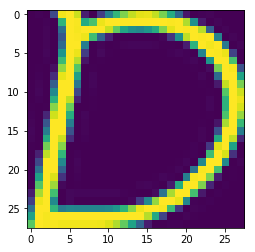

image size is: (28, 28)


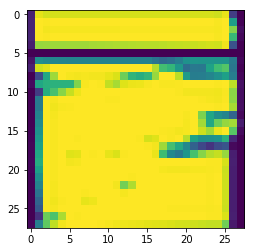

validation data has size of: 10000
image size is: (28, 28)


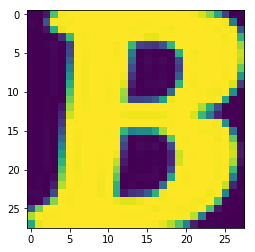

image size is: (28, 28)


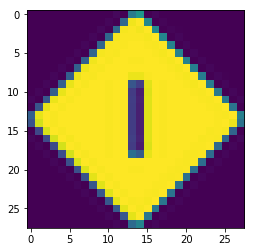

test data has size of: 10000
image size is: (28, 28)


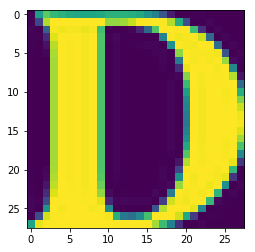

image size is: (28, 28)


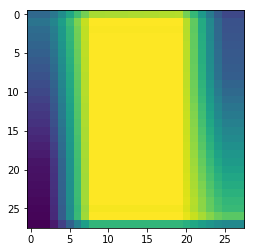

In [10]:
#lets visualize some of the data from the train, validation, and test set to make sure that the data is still good
import random
#check the size of the train data
print("training data has size of:",len(train_dataset))
#get randomly 2 images
randIndices = random.sample(range(0, len(train_dataset)), 2)
for i in randIndices:
    print("image size is:",train_dataset[i].shape)
    plt.imshow(train_dataset[i], interpolation='nearest')
    plt.show()
#check the size of the validation data
print("validation data has size of:",len(valid_dataset))
#get randomly 2 images
randIndices = random.sample(range(0, len(valid_dataset)), 2)
for i in randIndices:
    print("image size is:",valid_dataset[i].shape)
    plt.imshow(valid_dataset[i], interpolation='nearest')
    plt.show()
#check the size of the test data
print("test data has size of:",len(test_dataset))
#get randomly 2 images
randIndices = random.sample(range(0, len(test_dataset)), 2)
for i in randIndices:
    print("image size is:",test_dataset[i].shape)
    plt.imshow(test_dataset[i], interpolation='nearest')
    plt.show()
    

Finally, let's save the data for later reuse:

In [11]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [12]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size is:', statinfo.st_size)

Compressed pickle size is: 690800503


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.


In [13]:
#we compare the image array and count the overlapping entries
#we assume the arrays have same shape
#check overlapping training and validation sets
#uncomment below block to check the overlap, it might take some time to execute as it is O(n^2) in complexity

train_valid_overlapcount = 0
for i in range(len(train_dataset)):
    for j in range(len(valid_dataset)):
        #lets check if the two image arrays are equal
        if np.array_equal(train_dataset[i], valid_dataset[j]):
            train_valid_overlapcount+=1
            break # lets not compare this duplicate with others again
print("train valid overlapcount is:",train_valid_overlapcount)
#check overlapping training and test sets
train_test_overlapcount = 0
for i in range(len(train_dataset)):
    for j in range(len(valid_dataset)):
        #lets check if the two image arrays are equal
        if np.array_equal(train_dataset[i], test_dataset[j]):
            train_test_overlapcount+=1
            break # lets not compare this duplicate with others again
print("train test overlapcount is:",train_test_overlapcount)

train valid overlapcount: 3441
train test overlapcount: 3500


Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [ ]:
#check for near duplicates
#we compare the image array and count the nearby entries
#we assume the arrays have same shape
#check closer training and validation sets, we use a tolerance of atol=0.0001 to assume the elements of array equal
#Uncomment the below block to find the near entries

train_valid_closecount = 0
for i in range(len(train_dataset)):
    for j in range(len(valid_dataset)):
        #lets check if the two image arrays are equal
        if np.all(np.isclose(train_dataset[i], valid_dataset[j], atol=0.0001)):
            train_valid_closecount+=1
print("train valid closer count:",train_valid_closecount)
#check closer training and test sets
train_test_closecount = 0
for i in range(len(train_dataset)):
    for j in range(len(valid_dataset)):
        #lets check if the two image arrays are equal
        if np.all(np.isclose(train_dataset[i], test_dataset[j], atol=0.0001)):
            train_test_closecount+=1
print("train test closer count:",train_test_closecount)


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [15]:
#We use the logistic regression to classify the images
#get the sklearn library
from sklearn import linear_model
#lets create the model
logreg = linear_model.LogisticRegression(C=1e5) #C is for inverse of regularization, the smaller the value the more regularization
#lets first take few samples and train our model
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
sampleSize = 50
data = train_dataset[:sampleSize].reshape((sampleSize, -1))
X = data
Y = train_labels[:sampleSize]
logreg.fit(X, Y)

#now lets predict the labels on the validation set
#Again we faltten the image data and trun the data in a (samples, feature) matrix:
valData = valid_dataset[:sampleSize].reshape((sampleSize, -1))
z = logreg.predict(valData)
#z = logreg.predict(np.c_[valData, valid_labels[:sampleSize]])
#lets measure the accuracy
accuracy = (np.count_nonzero(z==valid_labels[:sampleSize])/float(sampleSize))*100
print("for sample size:",sampleSize," accuracy is:",accuracy, "%")


for sample size: 50  accuracy is: 66.0 %


Lets try with sample size of 100

In [16]:
#lets see with other sample sizes
sampleSize = 100
data = train_dataset[:sampleSize].reshape((sampleSize, -1))
X = data
Y = train_labels[:sampleSize]
logreg.fit(X, Y)

#now lets predict the labels on the validation set
#Again we faltten the image data and trun the data in a (samples, feature) matrix:
valData = valid_dataset[:sampleSize].reshape((sampleSize, -1))
z = logreg.predict(valData)
#z = logreg.predict(np.c_[valData, valid_labels[:sampleSize]])
#lets measure the accuracy
accuracy = (np.count_nonzero(z==valid_labels[:sampleSize])/float(sampleSize))*100
print("for sample size:",sampleSize," accuracy is:",accuracy, "%")

for sample size: 100  accuracy is: 69.0 %


Lets try with sample size of 1000

In [17]:
sampleSize = 1000
data = train_dataset[:sampleSize].reshape((sampleSize, -1))
X = data
Y = train_labels[:sampleSize]
logreg.fit(X, Y)

#now lets predict the labels on the validation set
#Again we faltten the image data and trun the data in a (samples, feature) matrix:
valData = valid_dataset[:sampleSize].reshape((sampleSize, -1))
z = logreg.predict(valData)
#z = logreg.predict(np.c_[valData, valid_labels[:sampleSize]])
#lets measure the accuracy
accuracy = (np.count_nonzero(z==valid_labels[:sampleSize])/float(sampleSize))*100
print("for sample size:",sampleSize," accuracy is:",accuracy, "%")

for sample size: 1000  accuracy is: 71.1 %


Lets try with sample size of 5000

In [18]:
sampleSize = 5000
data = train_dataset[:sampleSize].reshape((sampleSize, -1))
X = data
Y = train_labels[:sampleSize]
logreg.fit(X, Y)

#now lets predict the labels on the validation set
#Again we faltten the image data and trun the data in a (samples, feature) matrix:
valData = valid_dataset[:sampleSize].reshape((sampleSize, -1))
z = logreg.predict(valData)
#z = logreg.predict(np.c_[valData, valid_labels[:sampleSize]])
#lets measure the accuracy
accuracy = (np.count_nonzero(z==valid_labels[:sampleSize])/float(sampleSize))*100
print("for sample size:",sampleSize," accuracy is:",accuracy, "%")

for sample size: 5000  accuracy is: 66.3 %
